# Pymaceuticals Inc.
---

### Analysis

  From the statistical summary table ,Capomulin and Ramicane are showing near similar results, with mean very close to median. Showing most tumor volumes are around the median with few if any extreme outliers. Both have the lowest standard deviation , also showing the data being closer to the mean than the rest of the sample set. Both with the lowest SEM scores as well, showing being closest to true population mean and in a Z-score formula would give a %95 confidence level in the results.
  Ketapril and Nafisol had the highest standard deviation and the highest SEM scores which would show that the sample mean is likely to vary considerably from true population mean. Interstingly enough was that the Placebo did better in the trails than Ketapril and Nafisol, and close the the others. It is my understanding that a Placebo is inert, a water pill if you will, and can be solely mind over matter, but the mice wouldn't know about that.Yet, it did as well as most of the other "real" drugs.
  The pie charts shows that the ratio , male to female, was almost equal. No results compare the groups seperatley, or by age as well, which would've added greatly to the analysis in my opinion.
  The box plot shows Infubinol having an extreme outlier, increasing the variance and skewing the mean, if it was droppped you would have a truer summary.
  The linear regression showed an increasing correlation between mouse wieght and tumor volume. 
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files

study_results_path = "data/Study_results.csv"
mouse_metadata_path = "data/Mouse_metadata.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df=pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()
# merged new df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
mouse_metadata.head()#checking original df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
study_results.head()#checking original df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [11]:
# Checking the number of mice using 'mouse_count' variable
mouse_count = mouse_study_df['Mouse ID'].nunique()
print("The number of mice:",mouse_count)

The number of mice: 249


In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# df['Zip'].dtype#

duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep="first")]["Mouse ID"].unique()

duplicate_mice

#array should be displayed array(['g989'], dtype=object) 


array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ids = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'],
                                                                     keep="last")]['Mouse ID']
duplicate_mice_data = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mice_ids)]
duplicate_mice_data.head()
#display duplicate mouse info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [14]:

cleaned_df = mouse_study_df.drop_duplicates(subset=['Mouse ID'], keep ='last')

cleaned_df["Mouse ID"].duplicated().sum()


0

In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicate_mice_ids) == False]
#create a negated(==) boolean series to check 'mouse_study_df' and keeps only mouse ids that
# are not in 'duplicate_mice_ids'
cleaned_df.head()
#display new df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [16]:
# Checking the number of mice in the clean DataFrame
cleaned_mouse_df = cleaned_df['Mouse ID'].nunique()
print("The number of mice:",cleaned_mouse_df)
#  the duplicate was removed, new count shown

The number of mice: 248


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# summary stats for 'drug_regimen' and 'tumor_volume' are placed in new variable'summary stats'

summary_stats = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

#column names assigned
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Total Volume Variance',
                         'Total Volume Std Deviation', 'Total Volume Std.Err']
summary_stats_df = pd.DataFrame(summary_stats)

summary_stats.head
#display results

<bound method NDFrame.head of               Mean Tumor Volume  Median Tumor Volume  Total Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Total V

In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_df = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
                    
                    
summary_stats_df.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std':'Std Deviation', 'sem': 'SEM'},inplace=True)
                   
# summary_stats_df.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']




summary_stats_df

#displaying summary

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

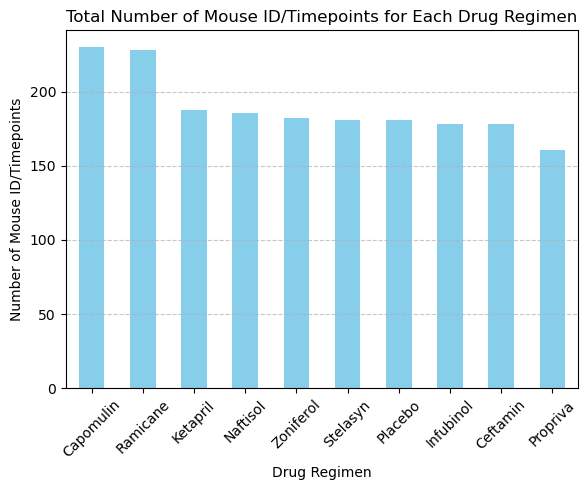

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


drug_regimen_counts = mouse_study_df['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', figsize=(6,5), color='skyblue')#size ,shape,style,color

plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')#added titlesm makes it a little clearer
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)#choose the line style --, thought it looked bettter

plt.tight_layout()
plt.show()

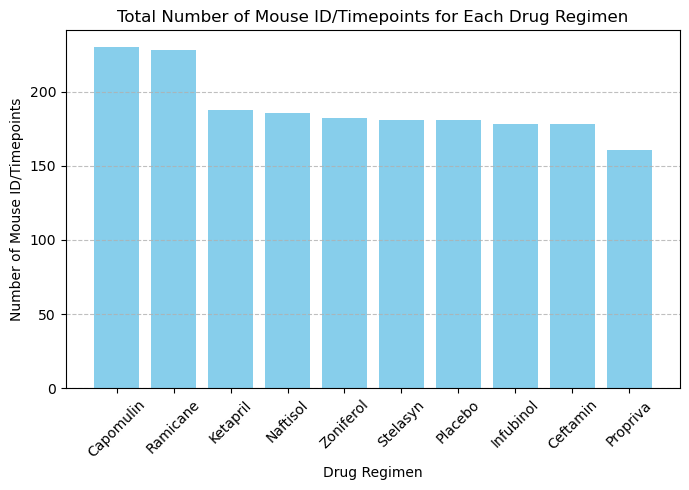

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts = mouse_study_df['Drug Regimen'].value_counts()

plt.figure(figsize=(7,5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')

plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)


plt.tight_layout()
plt.show()

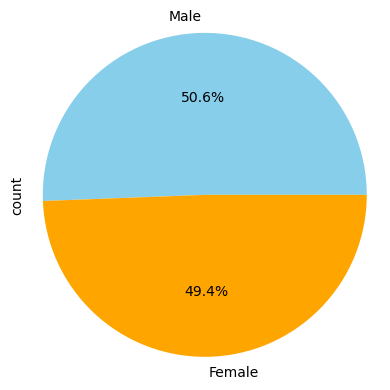

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = mouse_study_df['Sex'].value_counts()

gender_counts.plot(kind='pie', figsize=(4,4), autopct='%1.1f%%', colors=['skyblue', 'orange'])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


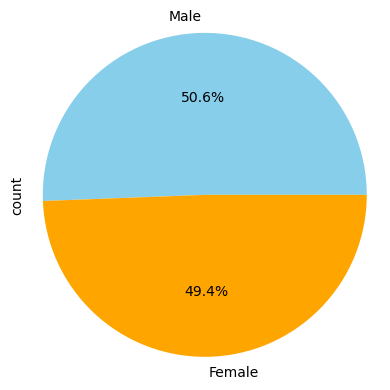

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = mouse_study_df['Sex'].value_counts()



gender_counts.plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%', colors=['skyblue', 'orange'])

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

last_timepoint = mouse_study_df.groupby('Mouse ID')['Timepoint'].max()

# Capomulin, Ramicane, Infubinol, and Ceftamin using inner merge

merged_df = pd.merge(last_timepoint, mouse_study_df, on=['Mouse ID', 'Timepoint'], how='inner')


# Start by getting the last (greatest) timepoint for each mouse using .isin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(treatment_regimens)]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])


    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
239     y769     Ceftamin           68.594745
240     y793    Capomulin           31.896238
241     y865     Ceftamin           64.729837
245     z578     Ramicane           30.638696
246     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes using 'treatments' list[]
    # for the range in a for loop

    tumor_volumes = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)
    # add subset 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
        
        
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
        
    print(f"{treatment}'s potential outliers: {outliers}")




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [26]:
import matplotlib.pyplot as plt

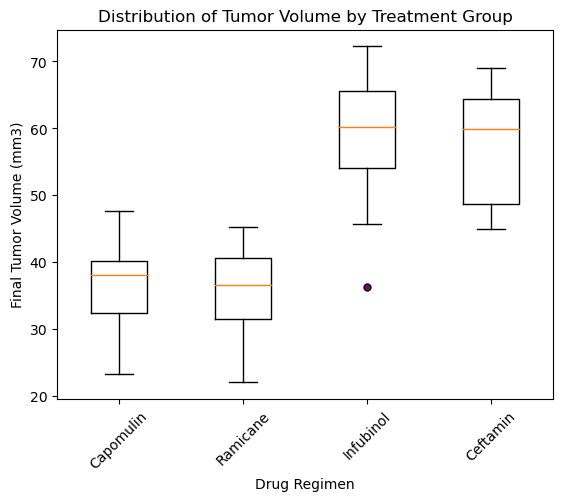

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
format_out = dict(markerfacecolor = "purple",markersize=5)
plt.boxplot(tumor_volume_data, labels = treatments, flierprops=format_out)

plt.title('Distribution of Tumor Volume by Treatment Group')
plt.suptitle('')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)

plt.show();


## Line and Scatter Plots

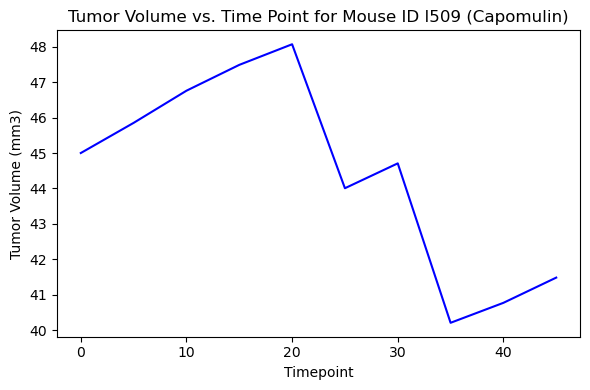

In [10]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'

single_mouse_data = mouse_study_df[(mouse_study_df['Mouse ID'] == mouse_id) & (mouse_study_df['Drug Regimen'] == 'Capomulin')]


plt.figure(figsize=(6, 4))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], color='b')


plt.title(f"Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


plt.tight_layout()
plt.show()




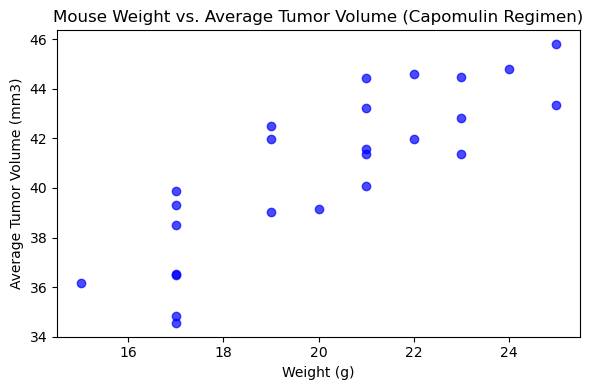

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID', how='inner')

plt.figure(figsize=(6, 4))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', alpha=0.7)

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


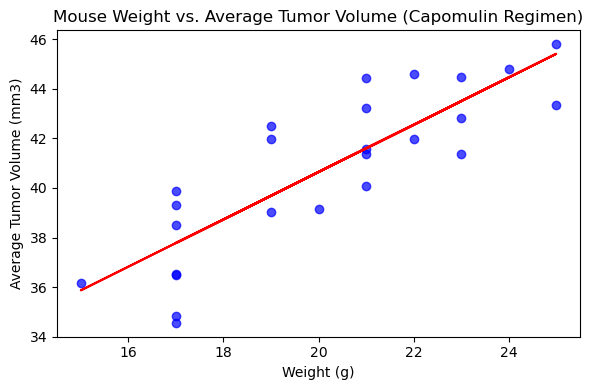

In [59]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress, pearsonr


correlation_coefficient, _ = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

slope, intercept, rvalue, pvalue, stderr = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.figure(figsize=(6, 4))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', alpha=0.7)

plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='r')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.tight_layout()
plt.show()